In [66]:
from socio import Socio
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

# Define Study Area and Summary of most recent ACS

In [100]:
addr = "373 VAN BRUNT STREET Brooklyn, NY"
radius = 0.5
year = 2017
survey = 'acs5'
borough = "Brooklyn"
api_key = '13c056d339e329f0a4fbef4384e3667e505a55da'

In [101]:
s = Socio(addr, radius, year, survey, borough, api_key)

In [102]:
summary_stats = s.get_summary_stats()

In [103]:
summary_stats

,median_income,percent_owners,percent_renters,population,unemployment_rate,vacancy_rate
Brooklyn,5.278200e+04,27.592055,64.265745,2635121.0,5.121267,8.142200
Study Area,-4.165795e+07,12.890776,80.393670,6235.0,8.460884,6.715554


# Plot Percentage Metrics for most recent year

(0, 100)

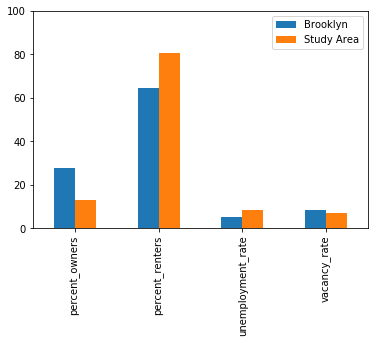

In [104]:
percentage_columns = ['percent_owners', 'percent_renters', 'unemployment_rate','vacancy_rate']
percentage_summaries = summary_stats[percentage_columns]

percentage_summaries.T.plot(y=list(summary_stats.index), kind='bar').set_ylim(0,100)

# Time Series

### Retrieve Summary Data for ACS5 years

In [79]:
years = range(2013, 2018)

borough_time_series = []
study_area_time_series = []

In [80]:
for year in years:
    print(year)
    s = Socio(addr, radius, year, survey, borough, api_key)
    borough_time_series.append(s.get_borough_summary())
    study_area_time_series.append(s.get_study_area_summary())

2013
2014
2015
2016
2017


In [88]:
borough_time_series = pd.DataFrame(borough_time_series, index=years)
borough_time_series['year'] = borough_time_series.index
borough_time_series['year'] = borough_time_series.apply(lambda row: "{} - {}".format(int(row['year'] - 4), int(row['year'])), axis=1)
borough_time_series

,median_income,percent_owners,percent_renters,population,unemployment_rate,vacancy_rate,year
2013,46085.0,27.207402,64.176782,2539789.0,6.782707,8.615817,2009 - 2013
2014,46958.0,26.986300,64.405117,2570801.0,6.657868,8.608583,2010 - 2014
2015,48201.0,26.808397,64.787247,2595259.0,6.320277,8.404356,2011 - 2015
2016,50640.0,27.056307,64.825833,2606852.0,5.717949,8.117861,2012 - 2016
2017,52782.0,27.592055,64.265745,2635121.0,5.121267,8.142200,2013 - 2017


In [89]:
study_area_time_series = pd.DataFrame(study_area_time_series, index=years)
study_area_time_series['year'] = study_area_time_series.index
study_area_time_series['year'] = study_area_time_series.apply(lambda row: "{} - {}".format(int(row['year'] - 4), int(row['year'])), axis=1)
study_area_time_series

,median_income,percent_owners,percent_renters,population,unemployment_rate,vacancy_rate,year
2013,4.185123e+04,6.613150,86.544343,6250.0,9.630102,6.842508,2009 - 2013
2014,4.585669e+04,10.231660,85.945946,6170.0,9.053582,3.822394,2010 - 2014
2015,4.060484e+04,10.133104,84.113353,5920.0,11.489734,5.753542,2011 - 2015
2016,4.477379e+04,12.435233,81.267437,6099.0,9.217578,6.297330,2012 - 2016
2017,-4.165795e+07,12.890776,80.393670,6235.0,8.460884,6.715554,2013 - 2017


### Plot the Pecentage Metrics
I did not do a time series prediction because there are too few points to create a confident model. 

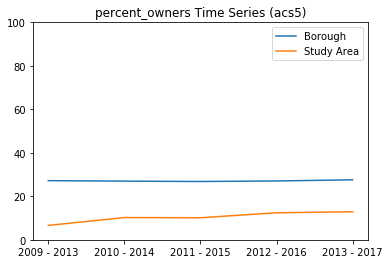

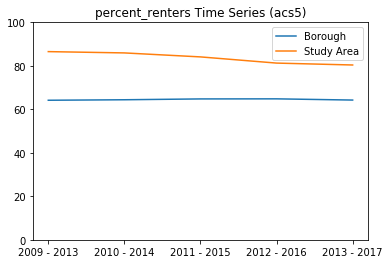

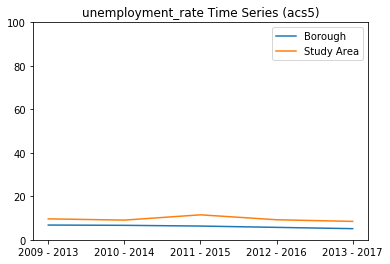

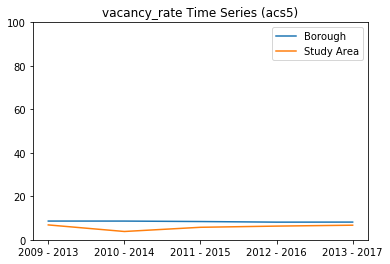

In [99]:
for metric in percentage_columns:
    plt.plot(borough_time_series['year'], borough_time_series[metric])
    plt.plot(study_area_time_series['year'], study_area_time_series[metric])
    plt.legend(['Borough', 'Study Area'])
    plt.title("{} Time Series ({})".format(metric, survey))
    plt.ylim(0, 100)
    plt.show()

# Incorperate RWCDS?
How do we assume, (renters vs. ownership), vacancy, and income for DRAW's building project? We we assume these numbers, we could say something like "# of renters in Red Hook increases at an average rate of 3% each year.  DRAW's building will increase the % of renters by 0.5% in the next year..."